In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
df_Dirac_G_O = (1/2)*pd.read_csv(r'Channel/Dirac_G_O_Channel.txt', sep = '\t', header = None)
df_Dirac_P_O = (1/2)*pd.read_csv(r'Channel/Dirac_P_O_Channel.txt', sep = '\t', header = None)

df_Dirac_G_U = (1/2)*pd.read_csv(r'Channel/Dirac_G_U_Channel.txt', sep = '\t', header = None)
df_Dirac_P_U = (1/2)*pd.read_csv(r'Channel/Dirac_P_U_Channel.txt', sep = '\t', header = None)

df_Dirac_G_S = (1/4)*pd.read_csv(r'Channel/Dirac_G_S_Channel.txt', sep = '\t', header = None)
df_Dirac_P_S = (1/4)*pd.read_csv(r'Channel/Dirac_P_S_Channel.txt', sep = '\t', header = None)

In [4]:
df_Dirac_G_O.rename(columns = lambda s:s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,0.017618,1.136150,1.548675,1.472945,2.303280,2.565815,3.284550,3.388810,4.266895,4.933765
2,0.141152,0.912350,1.574815,1.966080,2.377090,2.888005,2.950255,4.113365,4.184310,4.431470
3,0.460476,1.056510,1.274600,1.521965,2.364455,2.990410,3.080040,3.565950,4.034795,4.410130
4,0.410145,0.711440,1.153015,1.945030,2.198750,2.837375,3.388040,3.155900,4.323230,4.571435
5,0.275699,0.650170,1.409270,2.361695,2.556585,3.098395,3.365445,4.044930,4.434380,4.653610
...,...,...,...,...,...,...,...,...,...,...
99996,0.489920,0.835810,1.453650,1.737120,2.429195,2.906845,2.527760,3.716530,3.742735,4.837010
99997,0.749465,0.959100,1.211420,1.447300,2.263565,2.940160,3.252625,3.681445,3.928020,4.869300
99998,0.164454,0.802525,0.838850,1.884590,2.077820,2.777605,3.628955,3.685890,4.093640,5.140900
99999,0.793860,0.540210,1.412485,2.033325,2.237675,2.909495,3.346785,3.289710,4.312805,4.760815


In [5]:
G_O = df_Dirac_G_O.values
P_O = df_Dirac_P_O.values

G_U = df_Dirac_G_U.values
P_U = df_Dirac_P_U.values

G_S = df_Dirac_G_S.values
P_S = df_Dirac_P_S.values

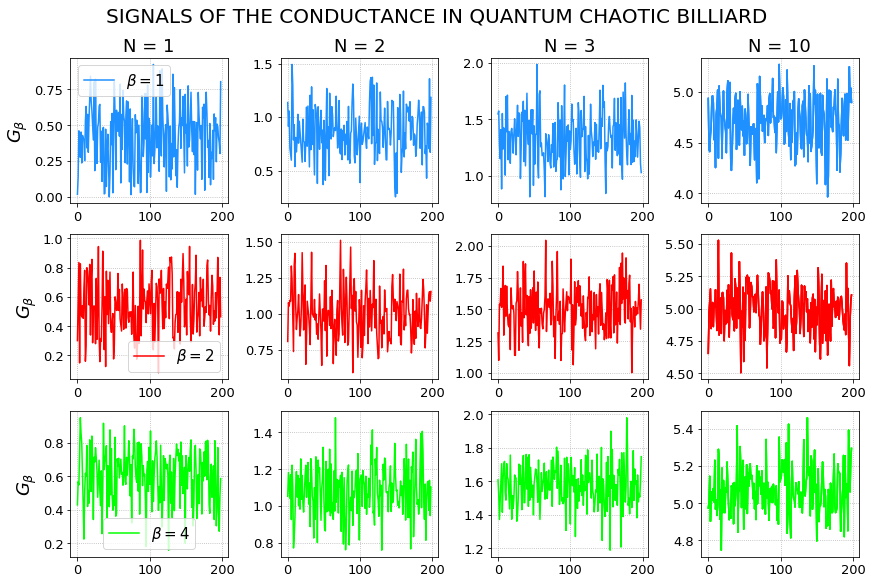

In [6]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

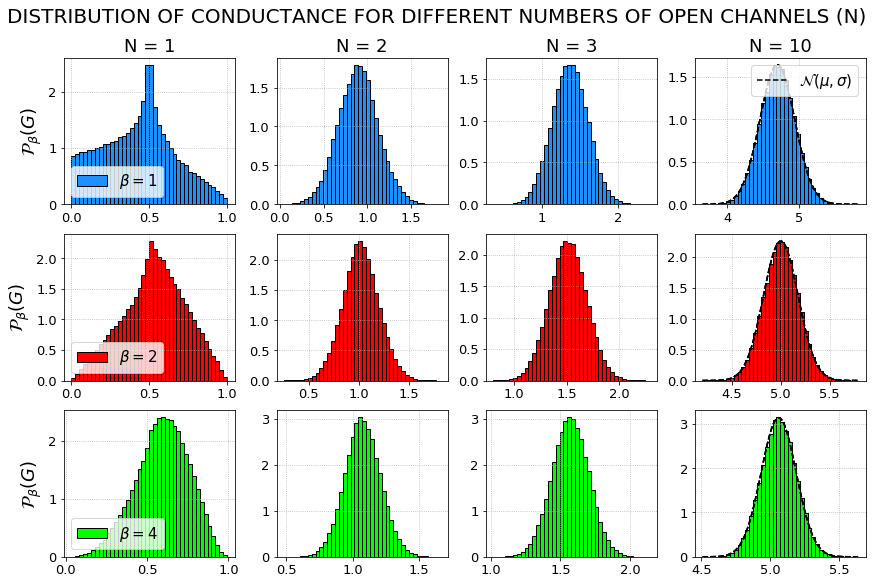

In [7]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 15, loc = "lower left")
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

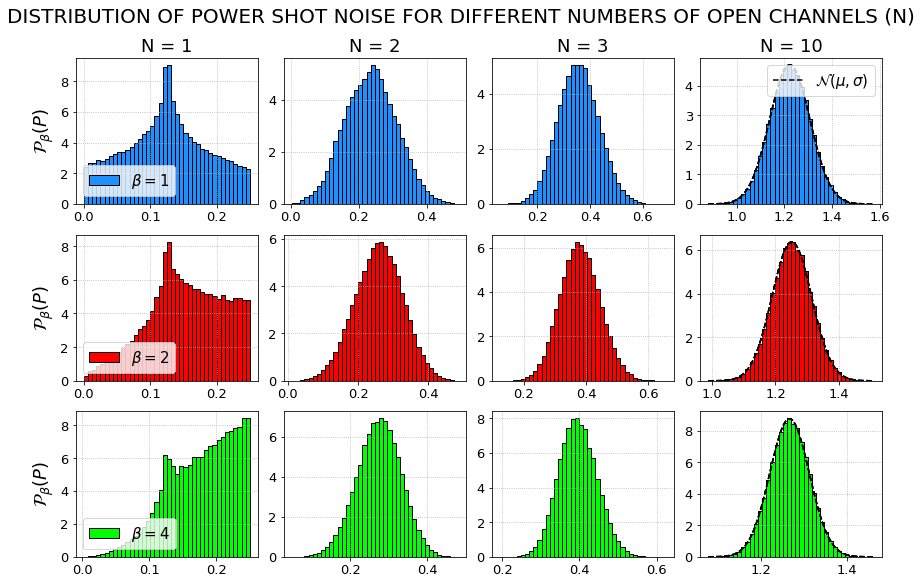

In [8]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
            axs[i,0].legend(fontsize = 15, loc = "lower left")
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')